# Evaluating Random Forest Performance

## Introduction
- Use the California Housing data set included in scikit-learn to predict the median house price based on various attributes
- Create a random forest regression model and evaluate its performance
- Investigate the feature importances for the model

In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install scipy==1.14.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 9.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 10.7 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
  Using cached contourpy-1.3.3-cp313-c

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

In [3]:
data = fetch_california_housing()
X, y = data.data, data.target

In [4]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [5]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Split 20% for training

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Explore the training data

In [7]:
eda = pd.DataFrame(X_train, columns=data.feature_names)

In [8]:
eda

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
1,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
2,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
3,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
4,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
16507,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
16508,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
16509,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
16510,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [10]:
eda['MedHouseVal'] = y_train
eda.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Text(0, 0.5, 'Frequency')

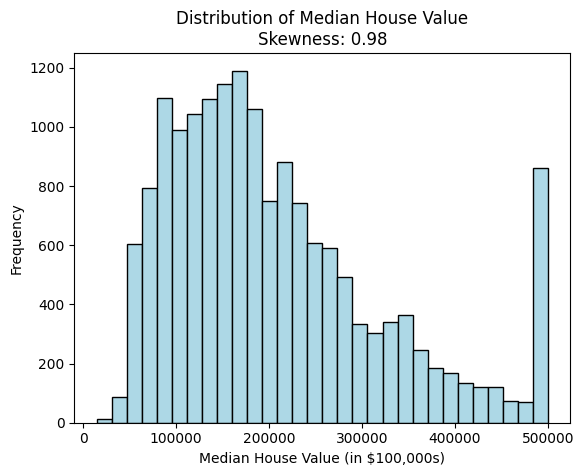

In [12]:
plt.hist(1e5 * eda['MedHouseVal'], bins=30, color='lightblue', edgecolor='black')
plt.title(f'Distribution of Median House Value\nSkewness: {skew(eda["MedHouseVal"]):.2f}')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Frequency')

### Model fitting and prediction

In [13]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
# Predict on test set
y_pred = rf_regressor.predict(X_test)

### Evaluate

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²): {r2:.4f}')

Mean Absolute Error (MAE): 0.3276
Mean Squared Error (MSE): 0.2557
Root Mean Squared Error (RMSE): 0.5057
R-squared (R²): 0.8049


MAE = $32,760 which means on average the predicted median house prices are off by $32K.
MSE is actually used during the model fit, however it's less intuitive to interpret.
80% of R-squared is considered not very high. It means that Features predict 80% of variance in the median house value. And it could mislead the result for complex data with nonlinear relationships, skewed values, and outliers.
R-squared can still be useful for model comparisons though.

These metrics do not explain about the performance of the model, where exactly the model did well or poorly.

### Plot actuals vs. predicted

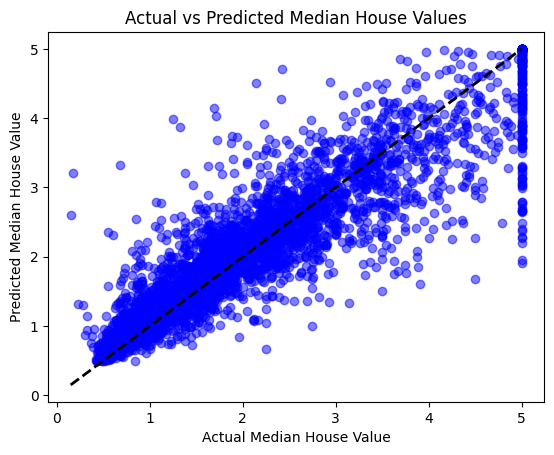

In [18]:
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Actual vs Predicted Median House Values')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()

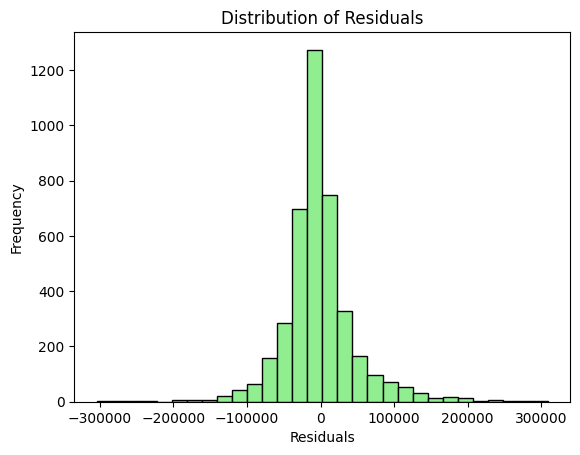

Average Residual: -1216.6295033914307
Residual Standard Deviation: 50554.71975236399


In [22]:
residuals = (y_test - y_pred)*1e5
plt.hist(residuals, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
print('Average Residual:', np.mean(residuals))
print('Residual Standard Deviation:', np.std(residuals))

### Plot model residual errors by median house value

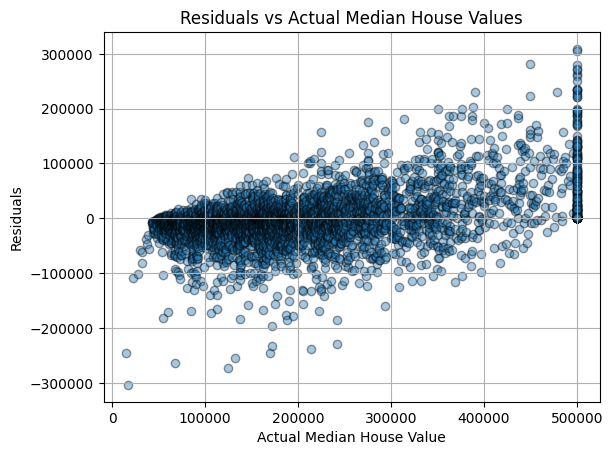

In [ ]:
residuals_df = pd.DataFrame({'Actual': 1e5*y_test, 'Residuals': residuals})
residuals_df = residuals_df.sort_values(by='Actual')
plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], alpha=0.4, marker='o', ec='k') # ec='k' shows density of bubles.
plt.title('Residuals vs Actual Median House Values')
plt.xlabel('Actual Median House Value')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

- What trend can we infer from this residual plot?
- Ans: Although we have average residual value of -$1216, the model predicted lower median prices as higher, and high prices to be underpredicted.

### Display Feature importances

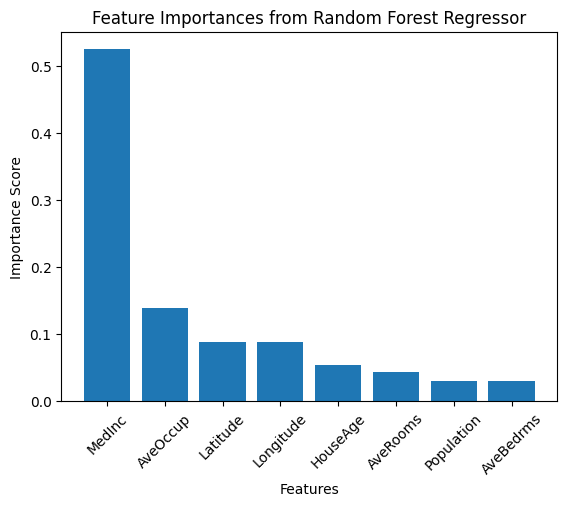

In [ ]:
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1] # -1 to reverse, Sort in descending order
features = data.feature_names

plt.bar(range(X.shape[1]), importances[indices], align='center') # X.shape[1] is number of columns/features
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()

- Q: Will the skewness affect the performance of Random Forest regression?
- Ans:   Random forest does not make any assumptions about the data distribution. It's quite robust against outliers and skewed distributions, whereas Linear regression performs best with normally distributed data.
Standardizing the data isn't necessary like it is for distance-based algorithms such as KNN or SVMs.

- Q: Does clipping of median house prices above 500K bias the predictions?
- Ans:   Clipped values can bia the predictions and mislead the evaluation metrics. \n
Removing them in preprocessing might help the model to better explain the actual variance in the data for example to include higher priced houses in the prediction.